In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.svm import SVC
from sklearn import metrics


In [23]:
df= pd.read_csv('BooksDataSet.csv')
df.drop(columns=['Unnamed: 0'], inplace=True)
df.head()

,book_id,book_name,genre,summary
0,3248537,Drowned Wednesday,Fantasy,Drowned Wednesday is the first Trustee among ...
1,27796919,The Lost Hero,Fantasy,"As the book opens, Jason awakens on a school ..."
2,3910776,The Eyes of the Overworld,Fantasy,Cugel is easily persuaded by the merchant Fia...
3,5969644,Magic's Promise,Fantasy,The book opens with Herald-Mage Vanyel return...
4,3173445,Taran Wanderer,Fantasy,Taran and Gurgi have returned to Caer Dallben...


In [7]:
df.shape

(3000, 5)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   book_id    3000 non-null   int64 
 1   book_name  3000 non-null   object
 2   genre      3000 non-null   object
 3   summary    3000 non-null   object
dtypes: int64(1), object(3)
memory usage: 93.9+ KB


In [26]:
df.isnull().sum()

book_id      0
book_name    0
genre        0
summary      0
dtype: int64

In [21]:

# sentences = df["summary"][0].split(". ")
# formatted_sentences = [sentence + "." for sentence in sentences]
# print("\n".join(formatted_sentences))
####----------------------------------------------------------------
# print("".join(char for char in df["summary"][0]))
print("Total characters is :",len(df['summary'][0]))
print("\n".join(df["summary"][0].split(". ")))

Total characters is : 4704
 Drowned Wednesday is the first Trustee among the Morrow Days who is on Arthur's side and wishes the Will to be fulfilled
She appears as a leviathan/whale and suffers from Gluttony
The book begins when Leaf is visiting Arthur and they are discussing the invitation that Drowned Wednesday sent him
Arthur had been admitted to hospital because of the damage done to his leg when he attempted to enter Tuesday's Treasure Tower
Suddenly, the hospital room becomes flooded with water as the two are transported to the Border Sea of the House
Leaf is snatched away by a large ship with green sails, known as the Flying Mantis, while Arthur remains in his bed
When the Medallion given him by the immortal called the Mariner apparently fails to summon help, Arthur is without hope
Eventually, a buoy marking the pirate Elishar Feverfew's treasure floats toward him
As soon as Arthur opens it, his hand is marked with a bloody red colour
Arthur now has the Red Hand, by which Feverf

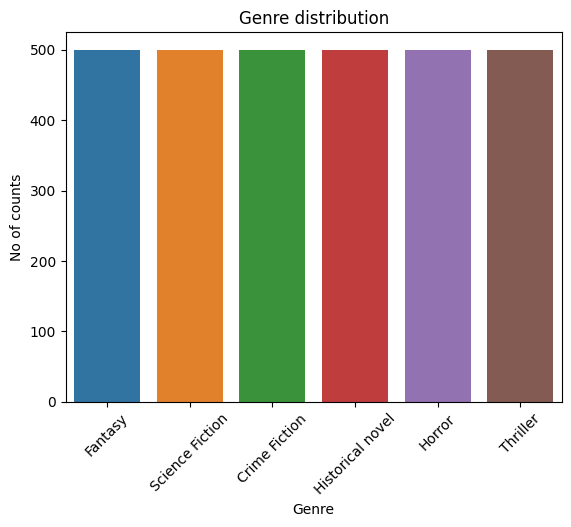

In [59]:
sns.countplot(x=df['genre'])
##----------------------------------------------------------------
# plt.bar(x=(df['genre'].value_counts()).keys() ,height=(df['genre'].value_counts()).values)
plt.xticks(rotation=45)
plt.title('Genre distribution')
plt.xlabel('Genre')
plt.ylabel('No of counts')
plt.show()

In [121]:
import re
def preprocessing_text(text):
    text= re.sub("'\''","", text)
    text= re.sub("[^a-zA-Z]"," ", text)
    text= ' '.join(text.split())
    text= text.lower()
    return text

df['summary']= df['summary'].apply( lambda x: preprocessing_text(x))
    

## Plotting the most frequent words

In [272]:
# #### Experimenting part over counting words
# ### 1st method
# from collections import Counter

# a = ['I love you', 'I hate you', 'I wanted to see you back in the bars', 'I hate you but love your thought']

# # Concatenate the sentences
# b = ' '.join(a)
# # Tokenize the string into words
# words = b.split()
# # Count occurrences of each unique word
# word_counts = Counter(words)
# # Output the counts
# print("Word Counts:")
# print(word_counts)
# # Total number of words
# total_words = len(words)
# print("\nTotal Number of Words:", total_words)


# ### 2nd method
# a = ['I love you', 'I hate you', 'I wanted to see you back in the bars', 'I hate you but love your thought']
# # Concatenate the sentences
# b = ' '.join(a)
# # Tokenize the string into words
# words = b.split()
# # Manual counting of occurrences using a dictionary
# word_counts = {}
# for word in words:
#     word_counts[word] = word_counts.get(word, 0) + 1

# # Output the counts
# print("Word Counts:")
# print(word_counts)

# # Total number of words
# total_words = len(words)
# print("\nTotal Number of Words:", total_words)


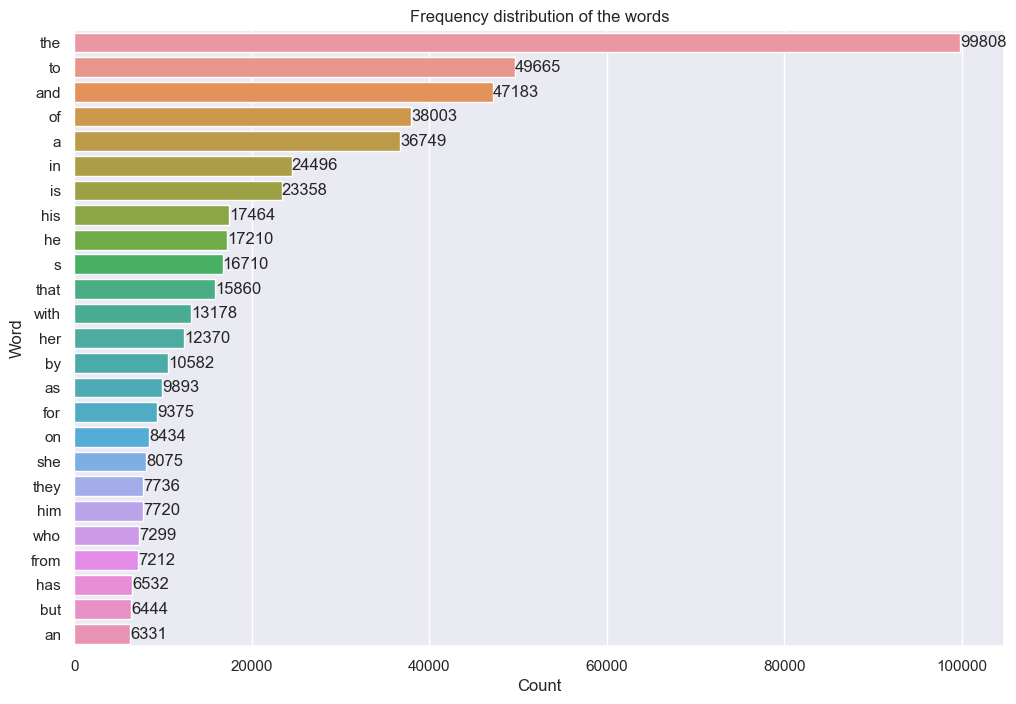

In [276]:
def text_Count_plot(data,text, n):
    all_text=' '.join([char for char in (data[text])])
    words= all_text.split()
    word_dict={}
    for word in words:
        word_dict[word]= word_dict.get(word,0)+1
    df_dict= pd.DataFrame(word_dict.items(), columns=['Word','Count'])
    df_dict.sort_values(by='Count', ascending=False, inplace=True)
    df_dict= df_dict.head(n).reset_index(drop=True)   
    
    ####----------------------------------------------------------------
    sns.set_theme(style='darkgrid')  # You can choose a different theme here
    plt.figure(figsize=(12,8)) 
    sns.barplot(y='Word', x='Count', data=df_dict)
    # Add data labels at the end of each bar
    for index, value in enumerate(df_dict['Count']):
        plt.text(value+1, index, str(value), ha='left', va='center')
    plt.title('Frequency distribution of the words')
    plt.show()
    # return df_dict

text_Count_plot(df,'summary', 25)    

In [323]:
# nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words= set(stopwords.words('english'))
# Removing the stopwords

def remove_stopwords(text):
    words= text.lower()
    words = words.split()
    cleaned_text= [char for char in words if char not in stop_words]
    return ' '.join(cleaned_text)

df['summary']= df['summary'].apply(lambda x: remove_stopwords(x))
df

,book_id,book_name,genre,summary,summary2
0,3248537,Drowned Wednesday,Fantasy,drowned wednesday first trustee among morrow d...,drowned wednesday first trustee among morrow d...
1,27796919,The Lost Hero,Fantasy,book opens jason awakens school bus unable rem...,book opens jason awakens school bus unable rem...
2,3910776,The Eyes of the Overworld,Fantasy,cugel easily persuaded merchant fianosther att...,cugel easily persuaded merchant fianosther att...
3,5969644,Magic's Promise,Fantasy,book opens herald mage vanyel returning countr...,book opens herald mage vanyel returning countr...
4,3173445,Taran Wanderer,Fantasy,taran gurgi returned caer dallben following ev...,taran gurgi returned caer dallben following ev...
...,...,...,...,...,...
2995,10372180,White Death,Thriller,novel numa files kurt austin adventure novel m...,novel numa files kurt austin adventure novel m...
2996,14504372,Venus with Pistol,Thriller,gilbert kemp dealer specializing antique guns ...,gilbert kemp dealer specializing antique guns ...
2997,3617412,Blackwater,Thriller,know deep davey always lived shadow older brot...,know deep davey always lived shadow older brot...
2998,11320975,The Rainbow and the Rose,Thriller,story concerns life johnnie pascoe retired com...,story concerns life johnnie pascoe retired com...


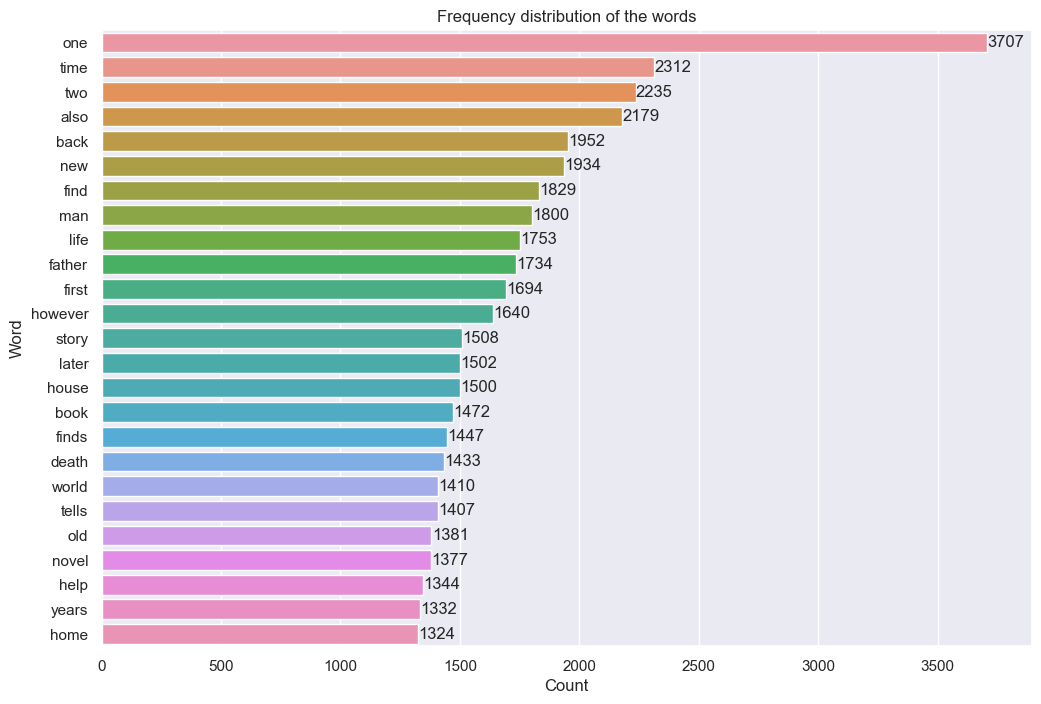

In [337]:
text_Count_plot(df,'summary', 25) 

In [336]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

lemma=WordNetLemmatizer()

def lematizing(sentence):
    stemSentence = ""
    for word in sentence.split():
        stem = lemma.lemmatize(word)
        stemSentence += stem
        stemSentence += " "
    stemSentence = stemSentence.strip()
    return stemSentence


df['summary'] = df['summary'].apply(lambda x: lematizing(x))

In [366]:
### Experiment to get all accurate lemmatized word for all pos

nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
import nltk
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag

    
def lemmatize_with_pos(word):
    tag = pos_tag([word])[0][1]  # Get the full POS tag
    if tag.startswith('NN'):
        lemmatizer = WordNetLemmatizer()
        return lemmatizer.lemmatize(word, pos='n')
    elif tag.startswith('VB'):
        lemmatizer = WordNetLemmatizer()
        return lemmatizer.lemmatize(word, pos='v')
    elif tag.startswith('JJ'):
        lemmatizer = WordNetLemmatizer()
        return lemmatizer.lemmatize(word, pos='a')
    else:
        return word
    

words = ["better", "running", "mice", "bettering", "runs", "cats"]
lemmatized_words = [lemmatize_with_pos(word) for word in words]
print(lemmatized_words)  # Output: ['good', 'run', 'mouse', 'better', 'run', 'cat']

['better', 'run', 'mouse', 'bettering', 'run', 'cat']


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\zeesh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\zeesh\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [378]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

def Porter_stemming(text):
    stemmed_sentences= ""
    for word in text.split():
        stemmed_word = stemmer.stem(word)
        stemmed_sentences += stemmed_word
        stemmed_sentences +=" "
    stemmed_sentences = stemmed_sentences.strip()
    return stemmed_sentences 

df['summary'] = df['summary'].apply(lambda x: Porter_stemming(x))   


# Encoding


In [384]:
book_list=list(df['genre'].unique())
encode= [i for i in range(len(book_list))]
mapper = dict(zip(book_list,encode))
mapper

{'Fantasy': 0,
 'Science Fiction': 1,
 'Crime Fiction': 2,
 'Historical novel': 3,
 'Horror': 4,
 'Thriller': 5}

In [386]:
df['genre']= df['genre'].map(mapper)

# Model Building


In [393]:
count_vec= CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')

documents = [
    "The quick brown fox jumps over the lazy dog",
    "The dog barks at the mailman",
    "The cat chases the mouse around the house"
]

count_vec.fit(documents)  # Learns the vocabulary from the documents
count_matrix = count_vec.transform(documents)
print(count_matrix.toarray())



NotFittedError: Vocabulary not fitted or provided